LIBRARIES FOR THIS LAB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

GIVEN FUNCTIONS FOR OPTICS

In [2]:
def calculate_angles(p1,p2,p3): #through a line at x = 0.5
    vec_1 = p1 - p2
    intersection_line = [0,1]
    vec_1_norm = vec_1 / np.linalg.norm(vec_1)
    angle_between_1 = np.arccos(np.dot(vec_1_norm, intersection_line))

    vec_2 = p3 - p2
    intersection_line = [0,-1]
    vec_2_norm = vec_2 / np.linalg.norm(vec_2)
    angle_between_2 = np.arccos(np.dot(vec_2_norm, intersection_line))
    
    return angle_between_1,angle_between_2

In [3]:
def light_travel_plot(p1,p2,p3,incident_angle,refractive_angle,v1=1.0,v2=0.8,travel_time=1.0): #give them this function
    x = np.array([p1[0],p2[0],p3[0]])
    y = np.array([p1[1],p2[1],p3[1]])

    #draw points connecting lines
    plt.scatter(x,y)
    plt.plot(x, y, linestyle='-', color='red')

    plt.xlim(-0.1,1.1) 
    plt.ylim(0,1)
    #fill medium below interface
    plt.axhspan(0, p2[1], color='gray', alpha=0.5)

    #calculate normal vector at interface
    incident_norm = np.array([0,0.5]) 
    refractive_norm = np.array([0,-0.5]) 
    
    plt.quiver(p2[0], p2[1], incident_norm[0], incident_norm[1],
               angles='xy', scale_units='xy', scale=0.1, color='blue', label='Normal',
              alpha = 0.3)

    plt.quiver(p2[0], p2[1], refractive_norm[0], refractive_norm[1],
               angles='xy', scale_units='xy', scale=0.1, color='blue', label='Normal',
              alpha = 0.3)
    
    arc = Arc(p2,0.3,0.3,theta1=90,theta2=90+np.degrees(incident_angle),color='green')
    plt.gca().add_patch(arc)
    
    arc = Arc(p2,0.3,0.3,theta1=270,theta2=270+np.degrees(refractive_angle),color='green')
    plt.gca().add_patch(arc)

    plt.text(p2[0] + 0.01, p2[1] + 0.15, f'{np.degrees(incident_angle):.1f}°', color='black')
    plt.text(p2[0] - 0.08, p2[1] - 0.15, f'{np.degrees(refractive_angle):.1f}°', color='black')

    plt.text(p2[0] - 0.25,p2[1] + 0.25, f'$v_1 = {v1}$',color = 'black',fontsize='large')
    plt.text(p2[0] - 0.25,p2[1] - 0.25, f'$v_2 = {v2}$', color = 'black',fontsize='large')

    plt.text(0.05,0.60,f't = {travel_time:.4f}',color = 'red',fontsize='large')
    
    plt.show()

In [4]:
def calculate_and_plot(p1,p2,p3,v1,v2):
    angles = calculate_angles(p1,p2,p3)
    time = total_time(p1,p2,p3,v_1,v_2)
    light_travel_plot(p1,p2,p3,*angles,v_1,v_2,time) #the difference
    return (angles[0],angles[1],time)
    
def calculate_only(p1,p2,p3,v1,v2):
    angles = calculate_angles(p1,p2,p3)
    time = total_time(p1,p2,p3,v_1,v_2)
    return (angles[0],angles[1],time)

In [5]:
from scipy.stats import linregress

def plot_snell_lines(v1_v2_pairs):
    """
    Overlay sin(Theta_r) vs sin(Theta_i) for multiple (v_1, v_2) pairs.
    """
    slopes = []
    ratios = []
    plt.figure(figsize=(8, 6))
    
    for v_1, v_2 in v1_v2_pairs:
        inc, ref = theta_vals(v_1, v_2,plot=False)
        sin_inc = np.sin(inc)
        sin_ref = np.sin(ref)
        slope, intercept, _, _, _ = linregress(sin_inc, sin_ref)
        slopes.append(slope)
        ratios.append(v_2 / v_1)
        
        plt.plot(sin_inc, sin_ref, label=f"$v_1$={v_1}, $v_2$={v_2}, slope={slope:.2f}")
    
    # Customize plot
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("sin(Θ_r) vs. sin(Θ_i)")
    plt.xlabel('sin(Θ_i)')
    plt.ylabel('sin(Θ_r)')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()
    
    # Plot slope vs ratio
    plt.figure(figsize=(8, 6))
    slope_vs_ratio = linregress(ratios, slopes)
    plt.plot(ratios, slopes, 'o', label=f"Slope = {slope_vs_ratio.slope:.2f}x + {slope_vs_ratio.intercept:.2f}")
    plt.plot(ratios, slope_vs_ratio.intercept + slope_vs_ratio.slope * np.array(ratios), '-', color='red')
    
    # Customize plot
    plt.title("Slopes vs. Velocity Ratio (v_1/v_2)")
    plt.xlabel("Velocity Ratio ($v_1/v_2$)")
    plt.ylabel("Slope of sin(Θ_r) vs. sin(Θ_i)")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

In [6]:
#THIS IS ALSO A GIVEN FUNCTION!
def theta_vals(v_1,v_2,plot=True):
    p1_x_vals = np.linspace(0.0,1.0,6)
    inc_angles = []
    ref_angles = []
    for p1_x in p1_x_vals:
        p1 = np.array([p1_x,1.0])
        p3 = np.array([1.0,0.0])
        best_x = minimize_scalar(travel_time_function(p1,p3,v_1,v_2))['x']
        p2 = np.array([best_x,0.5])
        if plot:
            inc_angle, ref_angle, time = calculate_and_plot(p1,p2,p3,v_1,v_2)
        else:
            inc_angle, ref_angle, time = calculate_only(p1,p2,p3,v_1,v_2)
        inc_angles.append(inc_angle)
        ref_angles.append(ref_angle)
    return inc_angles,ref_angles

QUESTION 1 - HERON'S METHOD   

Iterative numerical solutions are core to computational science. We use them to find the minima of complicated functions, to simulate many-body problems, and for many other things.

As a warmup, write a formula to iteratively find the square root of a number using Heron's Method. Include several inputs and outputs in your answer.

In [7]:
#answer should look something like this.
#as long as it works, it's good
def square_root(number):
    cutoff = 1e-10
    guess = number / 2
    while np.abs( guess**2 - number ) > cutoff:
        guess = (guess + number / guess) / 2
    return guess

In [8]:
inputs = [10,100,5,12,13,100]

In [9]:
for inp in inputs:
    print(f"input: {inp}")
    print(f"output: {square_root(inp)}")
    print()

input: 10
output: 3.162277660168379

input: 100
output: 10.0

input: 5
output: 2.23606797749979

input: 12
output: 3.4641016151377544

input: 13
output: 3.6055512754639896

input: 100
output: 10.0



QUESTION 2: DISTANCE AND TIME FUNCTIONS   

Write functions for distance and time, which will be used to calculate the travel time of light through your media.

In [10]:
#students should write these functions themselves
def distance(p1,p2):
    '''
    accepts two vectors, p1 and p2. can either be list or np.array
    '''
    return np.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 ) 

def total_time(p1,p2,p3,v_1,v_2):
    '''
    accepts three points (vector): p1, p2, and p3, and two speeds (scalar): v_1 and v_2,
    where p2 is on the boundary surface of the media with phase velocities v_1 and v_2.
    '''
    t1 = distance(p1,p2) / v_1
    t2 = distance(p2,p3) / v_2 
    return t1 + t2

QUESTION 3: PATH OF LEAST TIME   

In your answer to this question, include refraction plots at three different intersection X values. One of them should be reasonably close to the path of least time.
Following this, solve for the path of least time using the provided function and scipy.minimize_scalar().  

What do you notice about the angles made between the plane normal on each side of the boundary?   

How do you think these will change if we change the position of the top point? If we change the relative speeds of light between each medium?   


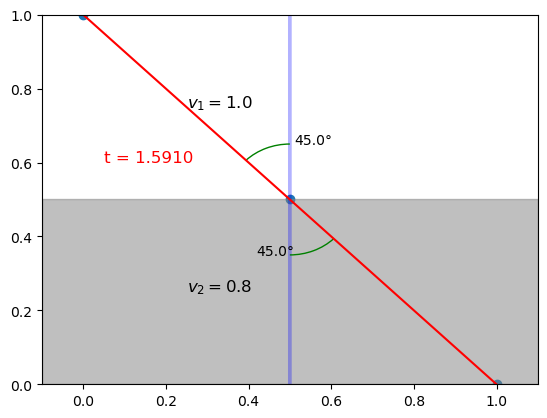

In [11]:
#STUDENTS SHOULD FIND THE BEST VALUE OF i for their chosen speeds
i = 0.5
p1 = np.array([0,1])
p2 = np.array([i,0.5])
p3 = np.array([1,0])
v_1 = 1.0
v_2 = 0.8
data =calculate_and_plot(p1,p2,p3,v_1,v_2)

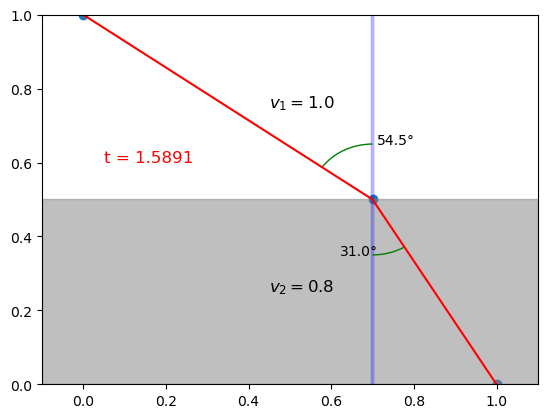

In [12]:
i = 0.7
p2 = np.array([i,0.5])
data =calculate_and_plot(p1,p2,p3,v_1,v_2)

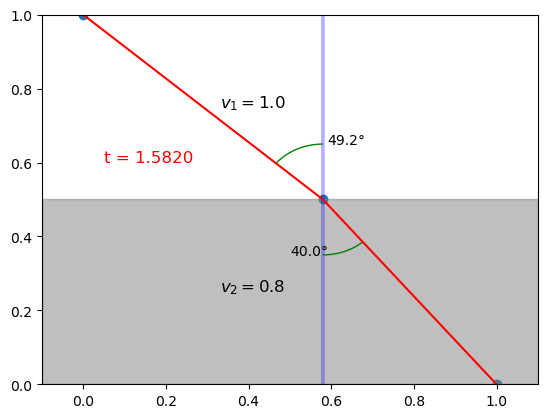

In [13]:
i = 0.58
p2 = np.array([i,0.5])
data =calculate_and_plot(p1,p2,p3,v_1,v_2)

In [14]:
#NOW DO IT AUTOMATICALLY
from scipy.optimize import minimize_scalar

In [15]:
#this function is given
def travel_time_function(p1,p3,v1,v2):
    def calculate_time(p2_x):
        return float(total_time(p1,np.array([p2_x,0.5]),p3,v1,v2))
    return calculate_time

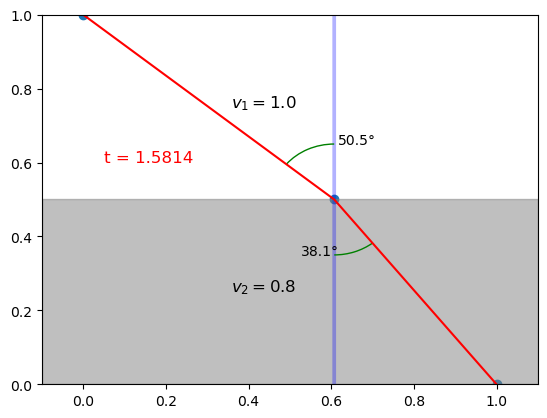

In [16]:
one_var_function = travel_time_function(p1,p3,v_1,v_2)
data = minimize_scalar(one_var_function)
best_x = data['x']
new_p2 = np.array([best_x,0.5])
data = calculate_and_plot(p1,new_p2,p3,v_1,v_2)

The angle on the top, where the speed of light is faster, is larger than the angle inside the medium where it is slower.  

This relationship will likely stay the same regardless of the positions of the two points, unless they are right on top of each other.   

As the speeds of light get more different, the difference in angle will get larger. If light were slower in the top medium, the top angle would be smaller than the bottom angle.

QUESTION 4: EXPRESSION FOR ANGLES  
  
Obtain refraction plots and associated angles for the path of least time for several different starting positions of the top point.  

Plot refracted versus incident angle.  
Also plot sin(refracted) versus sin(incident).
Is there any obvious relationship yet?

Use plot_snell_lines() to check sin(refracted) versus sin(incident) for several combinations of refractive indices for the two media.   
Write a formula, in the form y = m * x + b , relating sin(refracted), sin(incident), v(medium 1), and v(medium 2).

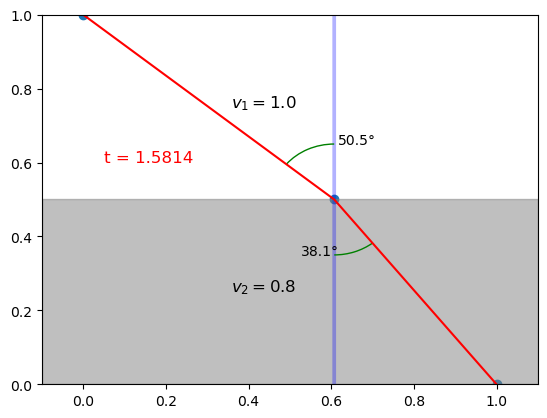

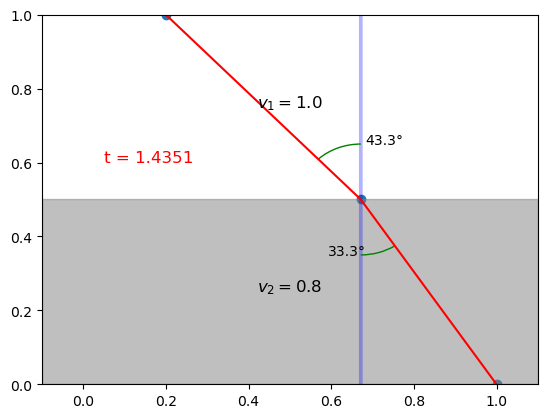

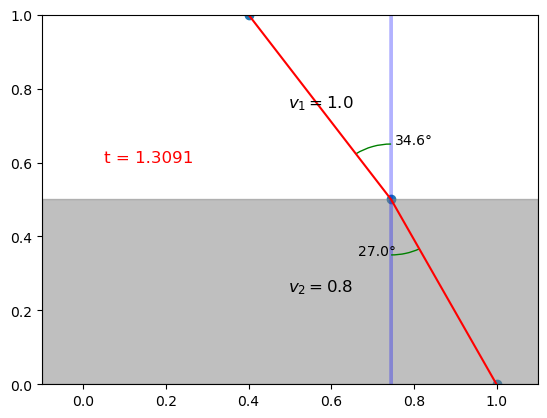

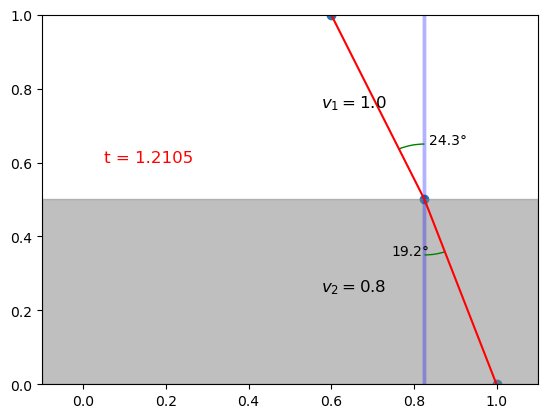

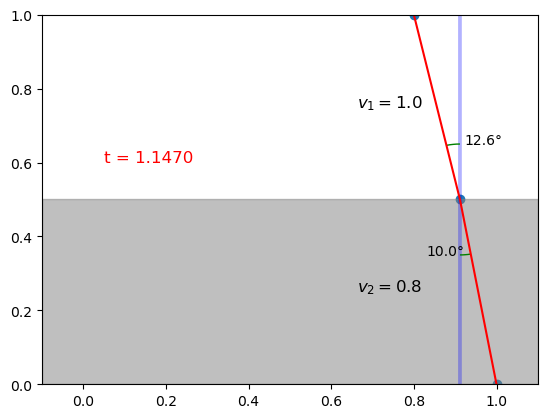

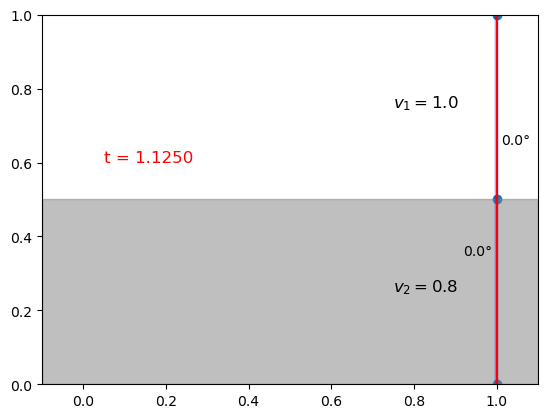

In [17]:
v_1 = 1.0
v_2 = 0.8
inc_angles, ref_angles = theta_vals(v_1,v_2,plot=True)

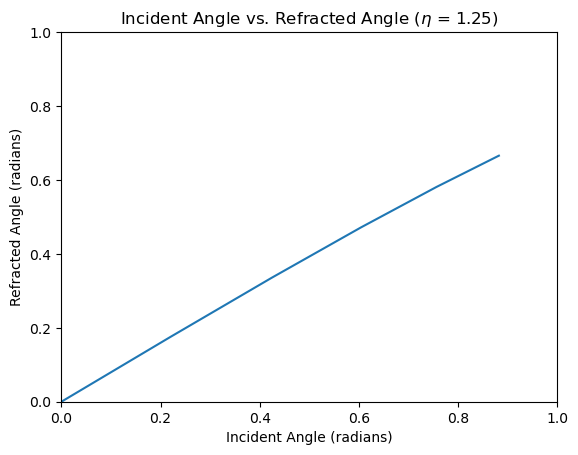

In [18]:
plt.plot(inc_angles,ref_angles)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f'Incident Angle vs. Refracted Angle ($\eta$ = {1/v_2})')
plt.xlabel('Incident Angle (radians)')
plt.ylabel('Refracted Angle (radians)')
plt.show()

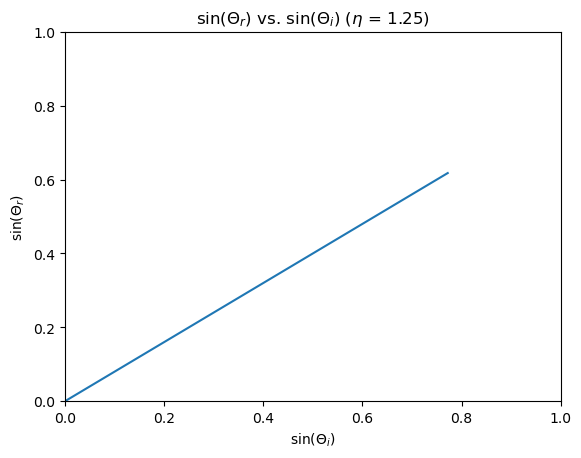

In [19]:
plt.plot(np.sin(inc_angles),np.sin(ref_angles))
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f'sin($\Theta{{}}_r$) vs. sin($\Theta{{}}_i$) ($\eta$ = {1/v_2})')
plt.xlabel('sin($\Theta_i$)')
plt.ylabel('sin($\Theta_r$)')
#plot should show trendline
plt.show()

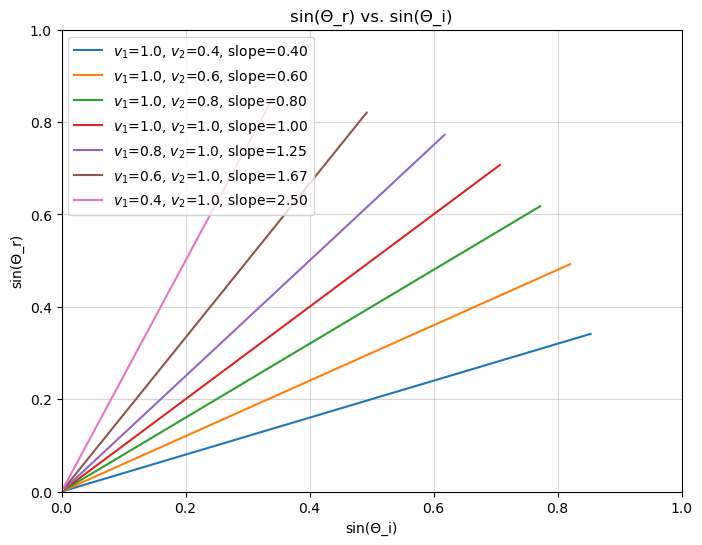

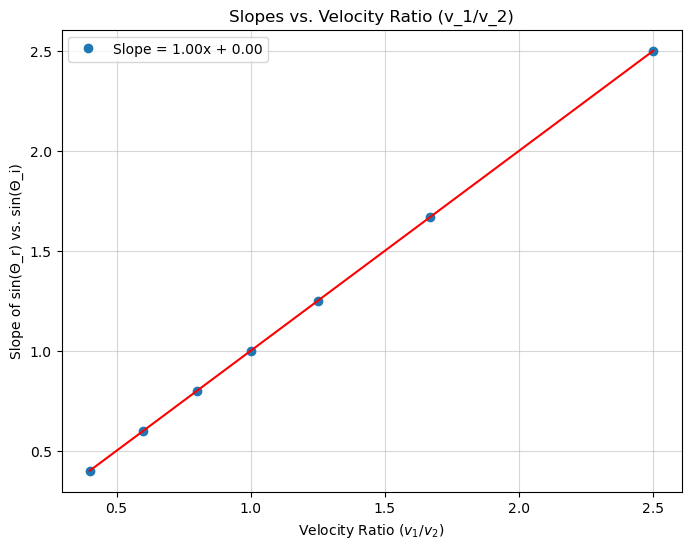

In [20]:
# Example combinations of v_1 and v_2
v1_v2_pairs = [(1.0, 0.4), (1.0, 0.6), (1.0, 0.8), (1.0,1.0), (0.8, 1.0), (0.6,1.0), (0.4,1.0)]
plot_snell_lines(v1_v2_pairs)

FORMULA FOR ANGLES:  
$sin(\theta_r) = \frac{v_r}{v_i} \cdot sin(\theta_i)$

QUESTION 5: SNELL'S LAW

This expression, which we derived from scratch, is equivalent to Snell's Law!  

Prove this using algebra.

Definition of Refractive Index:   
$\eta_{med} = \frac{c}{v_{med}}$   
Snell's Law:  
$\eta_r \cdot sin(\theta_r) = \eta_i \cdot sin(\theta_i)$  

Does it surprise you that we were able to find this expression only through first principles?  Do you know of any other examples of emergent behavior like this?

Answer   
$\eta_r \cdot sin(\theta_r) = \eta_i \cdot sin(\theta_i)$  
$\frac{c}{v_r} \cdot sin(\theta_r) = \frac{c}{v_i} \cdot sin(\theta_i)$  
$sin(\theta_r) = \frac{v_r}{c} \cdot \frac{c}{v_i} \cdot sin(\theta_i)$  
$sin(\theta_r) = \frac{v_r}{v_i} \cdot sin(\theta_i)$

Example prompt answer:
It is interesting but not surprising that this should happen.  
Another example of emergent behavior is the gas laws coming from the combined action of many, many individual gas particles obeying Newton's laws.